# HW 4 - ANOVA

In [1]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sns
%matplotlib inline

## Part A - Data: Blood lead levels

In [2]:
df = pd.read_excel('data_lead.xlsx')
df.head()

,Unnamed: 0,num,gender,lead,neighborhood
0,1,1,1,5,1
1,2,2,2,7,1
2,3,3,1,6,1
3,4,4,2,10,1
4,5,5,1,11,1


In [3]:
df.groupby('neighborhood')['lead'].mean()

neighborhood
1    8.13
2    6.57
3    5.01
Name: lead, dtype: float64

Text(0.5, 1.0, 'Histogram of Lead Blood Values for Study')

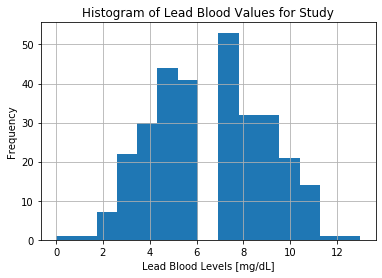

In [4]:
# histrobram of lead blood levels by neighborhood
ax = df['lead'].hist(bins=15)
ax.set_xlabel("Lead Blood Levels [mg/dL]")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Lead Blood Values for Study")

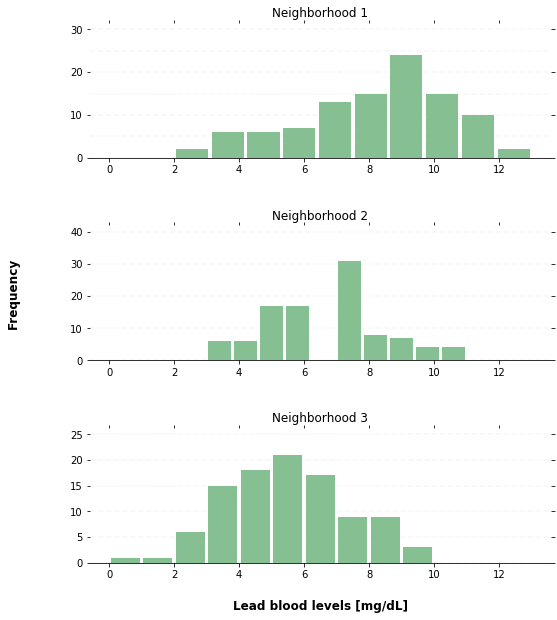

In [5]:
ax = df.hist(column='lead', by='neighborhood', bins=10, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    x.set_title(f'Neighborhood {i+1}')

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Lead blood levels [mg/dL]", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Frequency", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

In [6]:
df.groupby('neighborhood')['lead'].describe()

,count,mean,std,min,25%,50%,75%,max
neighborhood,,,,,,,,
1,100.0,8.13,2.167972,2.0,7.0,9.0,10.0,13.0
2,100.0,6.57,1.886984,3.0,5.0,7.0,7.0,11.0
3,100.0,5.01,1.941024,0.0,4.0,5.0,6.0,10.0


In [7]:
# one-way anova for blood lead level differences between neighborhood groups
stats.f_oneway(
    df['lead'][df['neighborhood'] == 1], 
    df['lead'][df['neighborhood'] == 2],
    df['lead'][df['neighborhood'] == 3]
)

F_onewayResult(statistic=60.69643352004099, pvalue=7.92626068744793e-23)

Text(0, 0.5, 'Lead blood levels [mg/dL]')

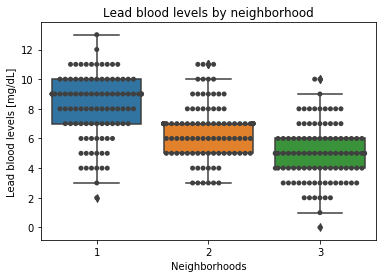

In [8]:
# boxplot
ax = sns.boxplot(x="neighborhood", y="lead", data=df)
ax = sns.swarmplot(x="neighborhood", y="lead", data=df, color=".25")
ax.set_title('Lead blood levels by neighborhood')
ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Lead blood levels [mg/dL]')

In [9]:
# Bonferroni correction to fine most effective medication

# take the alpha .05 and divide by number of planned comparisons (3)
# use this alpha for subsequent t-test comparisions
.05/3

0.016666666666666666

In [10]:
# t-test 1: compare neighborhood 1 and neighborhood 2
stats.ttest_ind(
    df[df['neighborhood'] == 1]['lead'], 
    df[df['neighborhood'] == 2]['lead']
)

Ttest_indResult(statistic=5.427668715418392, pvalue=1.6583924553711852e-07)

In [11]:
# t-test 1: compare neighborhood 1 and neighborhood 3
stats.ttest_ind(
    df[df['neighborhood'] == 1]['lead'], 
    df[df['neighborhood'] == 3]['lead']
)

Ttest_indResult(statistic=10.72191742650202, pvalue=1.9204074150616063e-21)

In [12]:
# t-test 1: compare neighborhood 1 and neighborhood 3
stats.ttest_ind(
    df[df['neighborhood'] == 2]['lead'], 
    df[df['neighborhood'] == 3]['lead']
)

Ttest_indResult(statistic=5.762666508909002, pvalue=3.132129208489653e-08)

In [13]:
# one-way anova for blood lead level differences between gender groups
a = stats.f_oneway(
    df['lead'][df['gender'] == 1], 
    df['lead'][df['gender'] == 2]
)

In [14]:
# one-sided t-test for blood lead level differences between gender groups
stats.ttest_ind(
    df[df['gender'] == 1]['lead'], 
    df[df['gender'] == 2]['lead']
)

Ttest_indResult(statistic=0.07300245999570826, pvalue=0.9418531343045176)

## Part B - Data: Medications to lower blood cholesterol

In [15]:
df = pd.read_excel('data_cholesterol.xls')
df.head()

,Medication,Age,Body Mass Index,Cholesterol
0,1,45,22,180
1,1,57,26,199
2,1,60,24,201
3,1,62,23,190
4,1,59,27,210


In [16]:
# one-way anova for blood cholesterol differences between medication groups
stats.f_oneway(
    df['Cholesterol'][df['Medication'] == 1], 
    df['Cholesterol'][df['Medication'] == 2],
    df['Cholesterol'][df['Medication'] == 3]
)

F_onewayResult(statistic=5.494053001321553, pvalue=0.010851498057733687)

In [17]:
df.groupby('Medication')['Cholesterol'].mean()

Medication
1    198.666667
2    182.888889
3    198.333333
Name: Cholesterol, dtype: float64

In [18]:
df.describe()

,Medication,Age,Body Mass Index,Cholesterol
count,27.00000,27.000000,27.000000,27.000000
mean,2.00000,58.481481,24.037037,193.296296
std,0.83205,7.366088,1.849771,13.384304
min,1.00000,45.000000,21.000000,170.000000
25%,1.00000,54.000000,23.000000,183.500000
50%,2.00000,59.000000,24.000000,192.000000
75%,3.00000,63.000000,25.000000,201.500000
max,3.00000,72.000000,28.000000,219.000000


In [19]:
# Bonferroni correction to fine most effective medication

# take the alpha .05 and divide by number of planned comparisons (3)
# use this alpha for subsequent t-test comparisions
.05/3

0.016666666666666666

In [20]:
# t-test 1: compare medication 1 and medication 2
stats.ttest_ind(
    df[df['Medication'] == 1]['Cholesterol'], 
    df[df['Medication'] == 2]['Cholesterol']
)

Ttest_indResult(statistic=2.8408523835918, pvalue=0.01180223060875749)

In [21]:
# t-test 2: compare medication 1 and medication 3
stats.ttest_ind(
    df[df['Medication'] == 1]['Cholesterol'], 
    df[df['Medication'] == 3]['Cholesterol']
)

Ttest_indResult(statistic=0.06140055598454818, pvalue=0.95180066235192)

In [22]:
# t-test 3: compare medication 2 and medication 3
stats.ttest_ind(
    df[df['Medication'] == 2]['Cholesterol'], 
    df[df['Medication'] == 3]['Cholesterol']
)

Ttest_indResult(statistic=-2.896619198183574, pvalue=0.010514515924755812)

Based upon the 3 t-tests above using an alpha = .0167, medication 2 appears to be most effective at lowering blood cholesterol levels.  [Bonferroni correction guide](https://pythonfordatascience.org/anova-python/)

Text(0, 0.5, 'Cholesterol blood levels [mg/dL]')

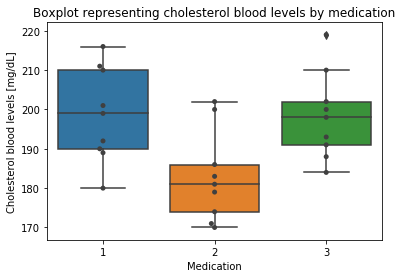

In [23]:
# boxplot
ax = sns.boxplot(x="Medication", y="Cholesterol", data=df)
ax = sns.swarmplot(x="Medication", y="Cholesterol", data=df, color=".25")
ax.set_title('Boxplot representing cholesterol blood levels by medication')
ax.set_xlabel('Medication')
ax.set_ylabel('Cholesterol blood levels [mg/dL]')

In [24]:
# doing one-way anova by hand
# source: https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

k = len(pd.unique(df.Medication)) # number of conditions
N = len(df.values) # conditions times participants (total)
n = 9 # participants in each condition

DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

# variability due to interaction b/w the groups
# this is the sum of squares of the model
SSbetween = (sum(df.groupby('Medication').sum()['Cholesterol']**2)/n) \
    - (df['Cholesterol'].sum()**2)/N

sum_y_squared = sum([value**2 for value in df['Cholesterol'].values])
# the variability in the data due to differences within people
SSwithin = sum_y_squared - sum(df.groupby('Medication').sum()['Cholesterol']**2)/n

SStotal = sum_y_squared - (df['Cholesterol'].sum()**2)/N

MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin

F = MSbetween/MSwithin
p = stats.f.sf(F, DFbetween, DFwithin)

In [25]:
SSerror = (sum(df.groupby('Medication').std()['Cholesterol']**2)/n) \
    - (df['Cholesterol'].std()**2)/N

In [26]:
SSerror

37.738656747916004

In [27]:
df.groupby('Medication').std()['Cholesterol']

Medication
1    11.979149
2    11.580635
3    11.034038
Name: Cholesterol, dtype: float64

In [28]:
print(F)
print(p)

5.494053001321755
0.010851498057732192


In [29]:
# one-way anova for blood cholesterol differences between medication groups
stats.f_oneway(
    df['Cholesterol'][df['Medication'] == 1], 
    df['Cholesterol'][df['Medication'] == 2],
    df['Cholesterol'][df['Medication'] == 3]
)

F_onewayResult(statistic=5.494053001321553, pvalue=0.010851498057733687)

In [30]:
df.groupby('Medication')['Cholesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
Medication,,,,,,,,
1,9.0,198.666667,11.979149,180.0,190.0,199.0,210.0,216.0
2,9.0,182.888889,11.580635,170.0,174.0,181.0,186.0,202.0
3,9.0,198.333333,11.034038,184.0,191.0,198.0,202.0,219.0
